In [12]:
import sys
import os
import time
import json


import numpy as np
import sklearn
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.manifold import TSNE

from sklearn import tree

In [13]:
url = 'https://raw.githubusercontent.com/malogalbo/BasicTitanic/main/data/test.csv'
test_data = pd.read_csv(url, encoding='cp1252', index_col = 0, on_bad_lines = "skip")
url = 'https://raw.githubusercontent.com/malogalbo/BasicTitanic/main/data/train.csv'
train_data = pd.read_csv(url, encoding='cp1252', index_col = 0, on_bad_lines = "skip")

# Loading and Pre-Processing Data

In [14]:
def train_val_split(x, y, prop_vec, shuffle=True, seed=None):

    assert x.shape[0] == y.shape[0]
    prop_vec = prop_vec / np.sum(prop_vec) # normalize

    n = x.shape[0]
    n_train = int(np.ceil(n * prop_vec[0]))
    n_val = n - n_train

    assert np.amin([n_train, n_val]) >= 1   

    if shuffle:
        rng = np.random.default_rng(seed)
        pi = rng.permutation(n)
    else:
        pi = np.arange(0, n)

    pi_train = pi[0:n_train]
    pi_val = pi[n_train:n]

    train_x = x[pi_train]
    train_y = y[pi_train]

    val_x = x[pi_val]
    val_y = y[pi_val]  
    
    return train_x, train_y, val_x, val_y

One Hot Encode:
"Pclass" 3rd, "Embarked" 

From String to Bool:
"Sex" 5th

Normalize/Standardize
"Fare"
"Age"
"Parch"
"sibsp"


y-column:
"Survived" 2nd

In [15]:
#4,5,6 
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


In [16]:
#Drop Name, Cabin, Ticket
names = ['Name', 'Cabin', 'Ticket']
train_data = train_data.drop(columns=names, axis=1)
test_data = test_data.drop(columns=names, axis=1)
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB
None


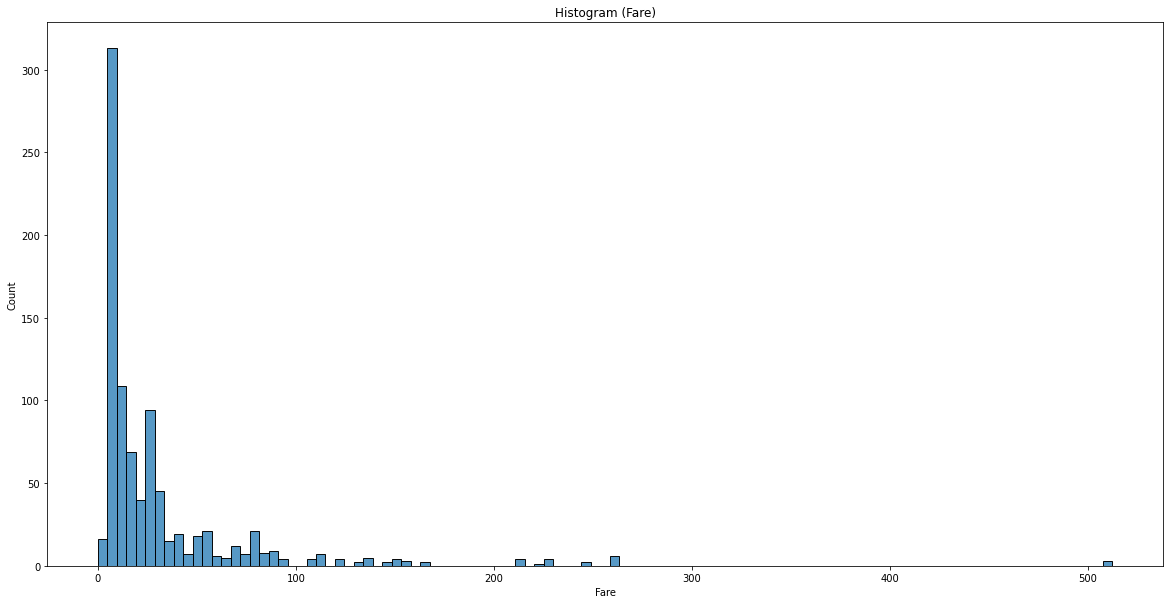

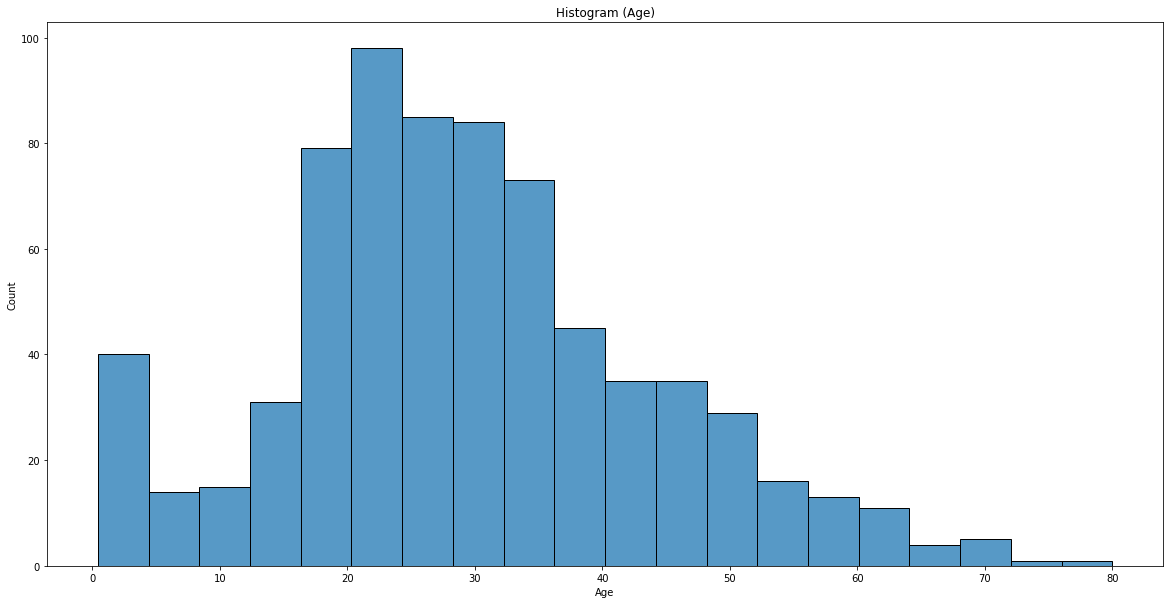

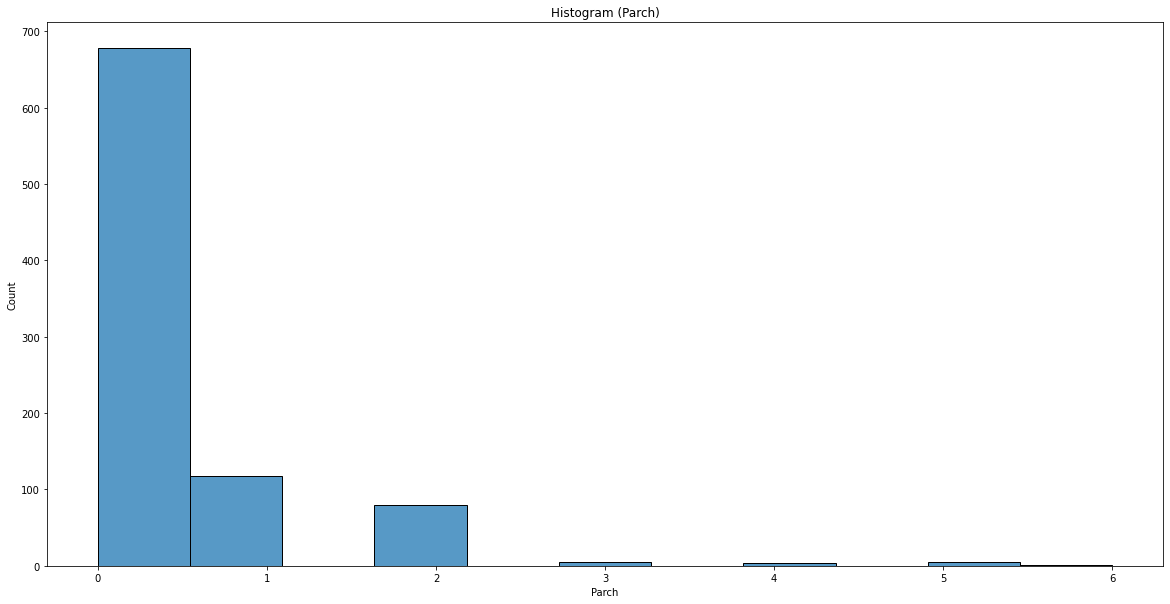

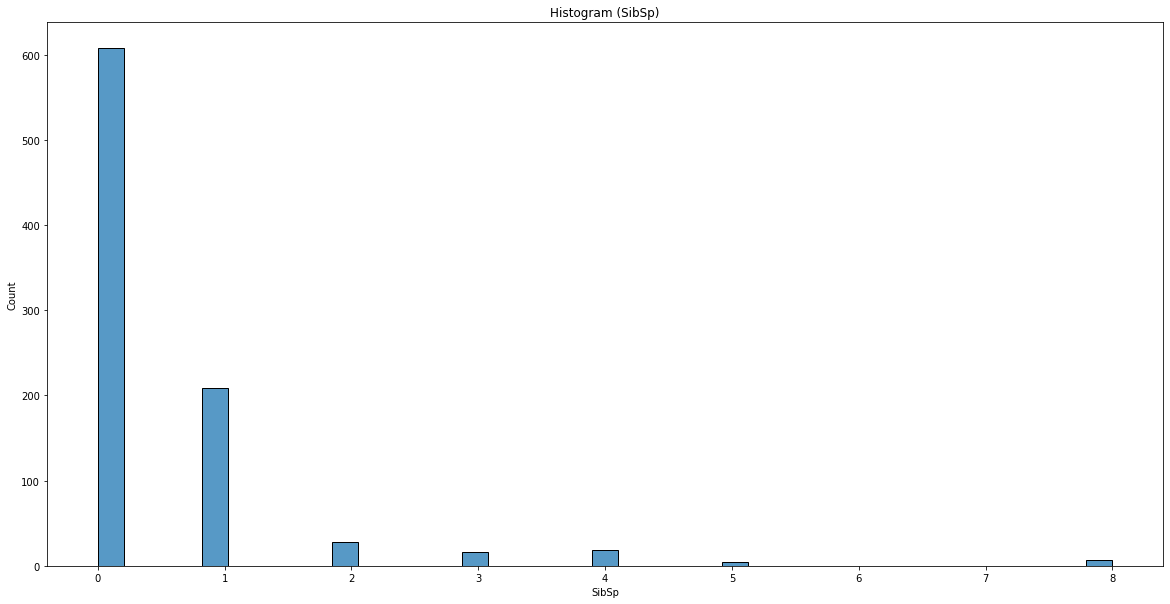

In [17]:
#Normalize/Standardize Fare , Age, Parch, Sibsp
names = ['Fare', 'Age', 'Parch', 'SibSp']
def plotHistogram(data, col):
    plt.figure(figsize = (20,10))
    sns.histplot(x = col, data = data)
    plt.title("Histogram (" + col + ")")
    plt.show()
for name in names:
    plotHistogram(train_data, name)

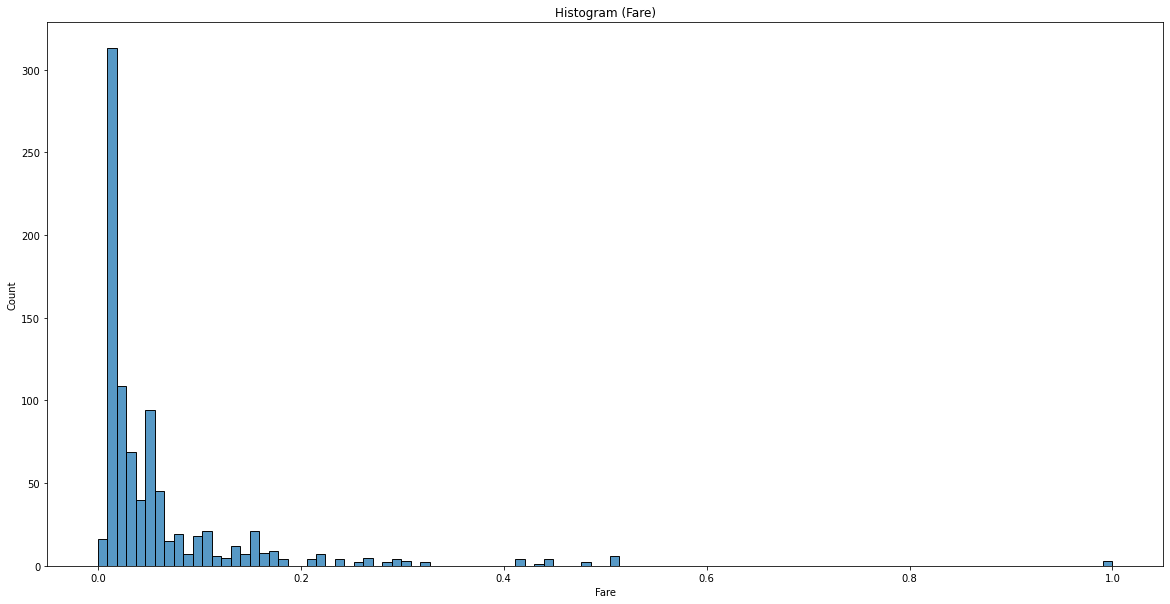

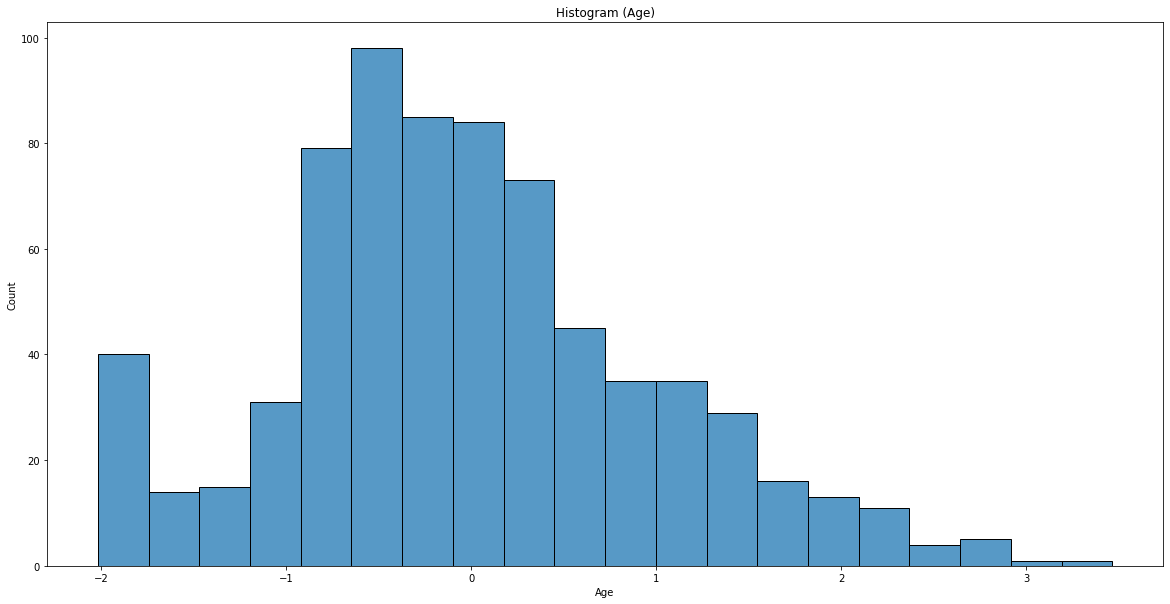

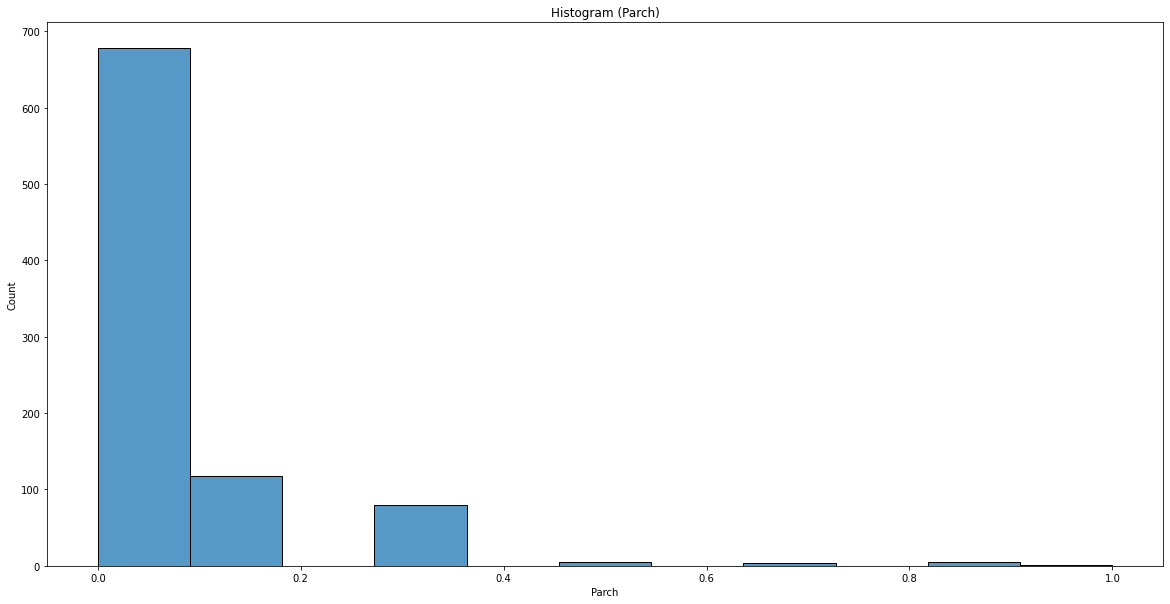

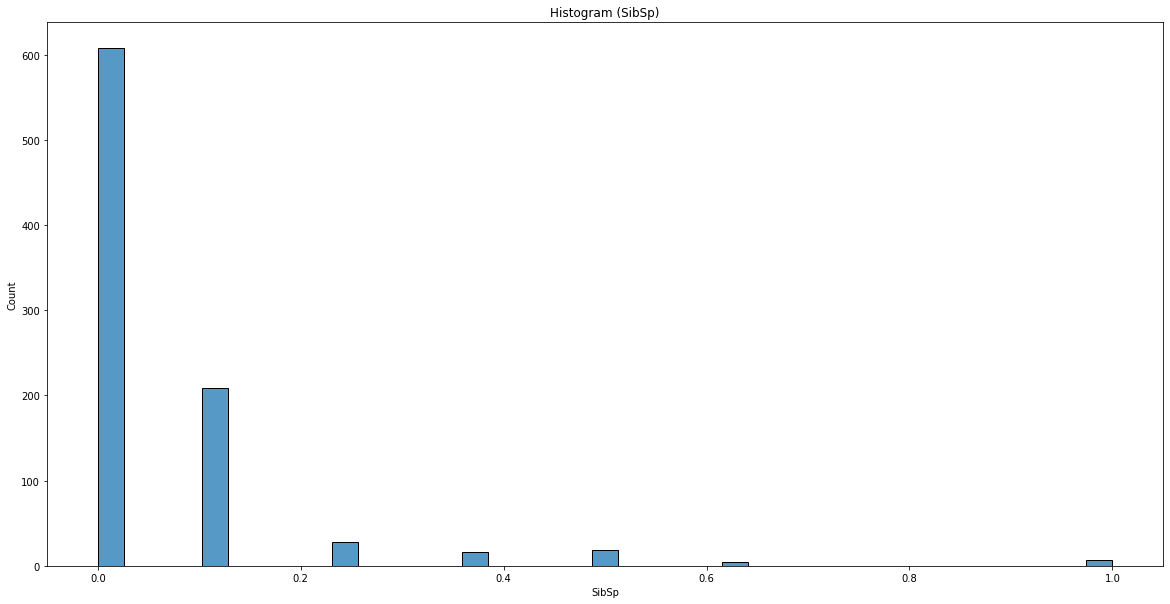

In [19]:
#Normalize: SibSp, Parch, Fare
#Standardize: Age
to_normalize = ['SibSp', 'Parch', 'Fare']
to_standardize = ['Age']
def normalize_standardize(data, norm, std):
    data[std] = StandardScaler().fit_transform(data[std])
    data[norm] = MinMaxScaler().fit_transform(data[norm])

normalize_standardize(train_data, to_normalize, to_standardize)
for name in names:
    plotHistogram(train_data, name)


In [ ]:
# Clean According To Above

# Extract y-column from training

# Then Split

In [ ]:
#extract y
train_y = train_data.loc[:, "Survived"]
train_x = train_data.drop(columns=['Survived'], axis=1)

#no test y
test_x = test_data

print(train_y)

In [ ]:
test_x = test_x.to_numpy()
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()

In [ ]:
print(train_x[0])
print(test_x[0])

In [ ]:
#one hot encode categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

features_to_standardize = [0, 6] #pclass and embarked

#train_x
tmp = encoder.fit_transform(train_x[:, features_to_standardize]).toarray() #encode data

train_x = np.delete(train_x, features_to_standardize, 1) #delete all old cat columns, 1 for col
train_x = np.concatenate((train_x, tmp), axis = 1) #add encoded variables to train_x

#test_x
tmp = encoder.fit_transform(test_x[:, features_to_standardize]).toarray()

test_x = np.delete(test_x, features_to_standardize, 1) #delete all old cat columns, 1 for col
test_x = np.concatenate((test_x, tmp), axis = 1)

In [ ]:
print(train_x[0])
print(test_x[0])

In [ ]:
#convert sex from string to bool
for i, sex in enumerate(train_x.T[0]): 
    if (sex == "male"):
        train_x[i, 0] = 1
    else: 
        train_x[i, 0] = 0
for i, sex in enumerate(test_x.T[0]): 
    if (sex == "male"):
        test_x[i, 0] = 1
    else: 
        test_x[i, 0] = 0


In [ ]:
print(train_x[0])